<a href="https://colab.research.google.com/github/Kdavis2025/Projects/blob/main/Project_6_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Definition
Build and train a convolutional neural network to classify images as “dog” (0) or “cat” (1), using the provided pickled image dataset and then test it on a held-out sample and on a new image (dog.jpg).

**Binary Classification Problem**



Load necessary packages

In [46]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import plot_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from PIL import Image

Data Collection

In [47]:
# URLs
url_1 = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/X.pickle'
url_2 = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/y.pickle'
url_3 = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/dog.jpg'

# Download files
!curl -O {url_1}
!curl -O {url_2}
!curl -O {url_3}

# Load data
with open('X.pickle', 'rb') as f:
    data_X = pickle.load(f)         # numpy array of shape (n_samples, height, width, channels)(4d Array)
with open('y.pickle', 'rb') as f:
    data_y = np.array(pickle.load(f))  # labels 0/1
data_dog = Image.open('dog.jpg')

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  237M  100  237M    0     0  64.1M      0  0:00:03  0:00:03 --:--:-- 64.1M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 49948  100 49948    0     0   292k      0 --:--:-- --:--:-- --:--:--  293k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 60603  100 60603    0     0   296k      0 --:--:-- --:--:-- --:--:--  295k


Data Cleaning

In [48]:
# Normalize pixel values to [0,1]
X = data_X.astype('float32') / 255.0
y = data_y

Exploratory Data Analysis

X shape: (24946, 100, 100, 1)
y shape: (24946,)


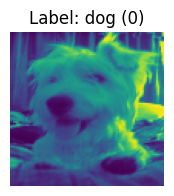

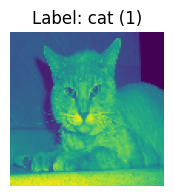

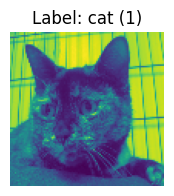

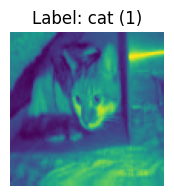

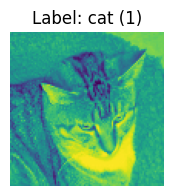

(np.float64(-0.5), np.float64(299.5), np.float64(354.5), np.float64(-0.5))

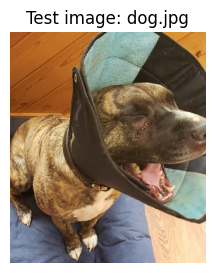

In [49]:
# Shapes
print("X shape:", X.shape)  # should be (n, h, w, c): 4 dimensional array for pictures
print("y shape:", y.shape)

# Show 5 random samples
indices = np.random.choice(len(X), size=5, replace=False)
for idx in indices:
    plt.figure(figsize=(2,2))
    plt.imshow(X[idx]) # X index
    plt.title(f"Label: {'dog' if y[idx]==0 else 'cat'} ({y[idx]})")
    plt.axis('off')
plt.show()

# Show the test image
plt.figure(figsize=(3,3))
plt.imshow(data_dog)
plt.title("Test image: dog.jpg")
plt.axis('off')

Data Processing

In [50]:
# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Build CNN
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=X_train.shape[1:]),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile
model.compile(optimizer='adam',                # The Adam optimizer, short for Adaptive Moment Estimation, is a popular optimization algorithm used in training deep learning models. The algorithm calculates an exponential moving average of the gradient and the squared gradient, controlled by the parameters beta1 and beta2.
              loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Communication of Results

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 98, 98, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 33856)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │     2,166,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,557,189 (25.01 MB)

 Trainable params: 2,185,729 (8.34 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,371,460 (16.68 MB)

Epoch 1/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9980 - loss: 0.0069 - val_accuracy: 0.9130 - val_loss: 0.6396
Epoch 2/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9999 - loss: 8.7053e-04 - val_accuracy: 0.9124 - val_loss: 0.6674
Epoch 3/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 1.0000 - loss: 3.3320e-04 - val_accuracy: 0.9168 - val_loss: 0.6729
Epoch 4/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 1.0000 - loss: 1.4137e-04 - val_accuracy: 0.9158 - val_loss: 0.6936
Epoch 5/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 1.0000 - loss: 1.3018e-04 - val_accuracy: 0.9152 - val_loss: 0.7124
Epoch 6/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 1.0000 - loss: 8.2870e-05 - val_accuracy: 0.9156 - val_loss: 0.7272
Epoch 7/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9999 - loss: 1.2516e-04 - val_accuracy: 0.9162 - val_loss: 0.7272
Epoch 8/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 1.0000 -

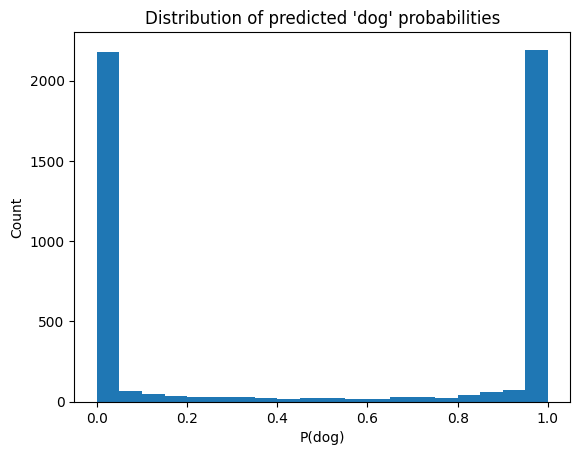

In [53]:
# Model summary & visualization
model.summary()
# plot_model(model, show_shapes=True, to_file='model.png')  # uncomment to save diagram

# Train
history = model.fit(
    X_train, y_train,      #The input data for training. In this case a NumPy array, TensorFlow dataset, or any other valid tensor-like object.The labels or target data corresponding to the input data x.
    epochs=20,             #The number of times to iterate over the entire dataset. This defines how many times the model will learn from the data.
    batch_size=32,         #Number of samples per gradient update. It determines the size of each mini-batch for training.
    validation_split=0.25  #Fraction of the training data to be used for validation (e.g., 0.1 means 10% of data will be used for validation).
)
#Early Stopping: You can use callbacks like EarlyStopping to stop training if the model performance doesn’t improve over a set number of epochs, preventing overfitting.
#from tensorflow.keras.callbacks import EarlyStopping
#early_stopping = EarlyStopping(monitor='val_loss', patience=3)
#EX:model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate
loss, acc = model.evaluate(X_test, y_test)
print(f"Test loss: {loss:.4f} — Test accuracy: {acc:.4f}")

# Plot predicted probability distribution on X_test
probs = model.predict(X_test).ravel()
plt.figure()
plt.hist(probs, bins=20)
plt.title("Distribution of predicted 'dog' probabilities")
plt.xlabel("P(dog)")
plt.ylabel("Count")
plt.show()

Bonus

In [ ]:
# Bonus: Upload your own image and predict with the trained CNN

from google.colab import files
from PIL import Image
import numpy as np

# 1. Upload an image file (dog or cat)
uploaded = files.upload()
# Grab the first uploaded filename
img_path = next(iter(uploaded.keys()))

# 2. Load and convert to grayscale, then back to RGB
img = Image.open(img_path)
img_gray = img.convert('L')  # grayscale
# replicate the single channel into three channels so it matches the model input
img_rgb = Image.merge("RGB", (img_gray, img_gray, img_gray))

# 3. Resize to match model input dimensions
_, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS = model.input_shape
img_resized = img_rgb.resize((IMG_WIDTH, IMG_HEIGHT))

# 4. Normalize and reshape into a batch of one
#Problem no 1 d to 4 d
img_array = np.array(img_resized).astype('float32') / 255.0
img_input = img_array.reshape((1, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))

# 5. Predict
prob = model.predict(img_input)[0,0]
label = 'dog' if prob > 0.5 else 'cat'

print(f"Prediction: {label} (P(dog) = {prob:.4f})")